/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 34s 120ms/step - accuracy: 0.7425 - loss: 0.8180 - val_accuracy: 0.9713 - val_loss: 0.0977
Epoch 2/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 31s 117ms/step - accuracy: 0.9611 - loss: 0.1311 - val_accuracy: 0.9793 - val_loss: 0.0692
Epoch 3/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 31s 118ms/step - accuracy: 0.9729 - loss: 0.0904 - val_accuracy: 0.9840 - val_loss: 0.0517
Epoch 4/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 42s 121ms/step - accuracy: 0.9777 - loss: 0.0710 - val_accuracy: 0.9844 - val_loss: 0.0512
Epoch 5/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 40s 117ms/step - accuracy: 0.9815 - loss: 0.0606 - val_accuracy: 0.9865 - val_loss: 0.0419
Epoch 6/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 41s 117ms/step - accuracy: 0.9845 - loss: 0.0528 - val_accuracy: 0.9876 - val_loss: 0.0383
Epoch 7/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 42s 122ms/step - accuracy: 0.9875 - loss: 0.0421 - val_accuracy: 0.9875 - val_loss: 0.0393
Epoch 8/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 40s 119ms/step - accuracy: 0.9886 - loss: 0

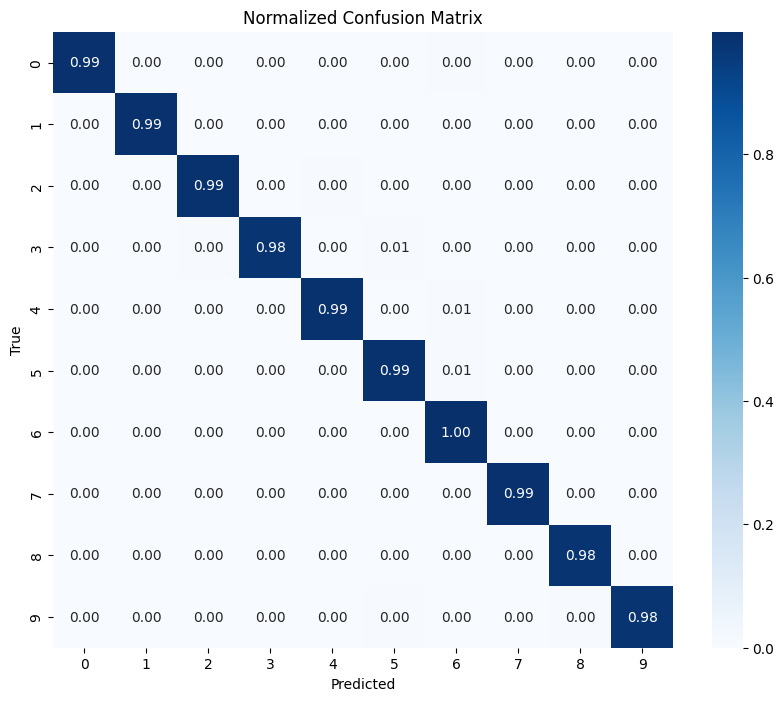

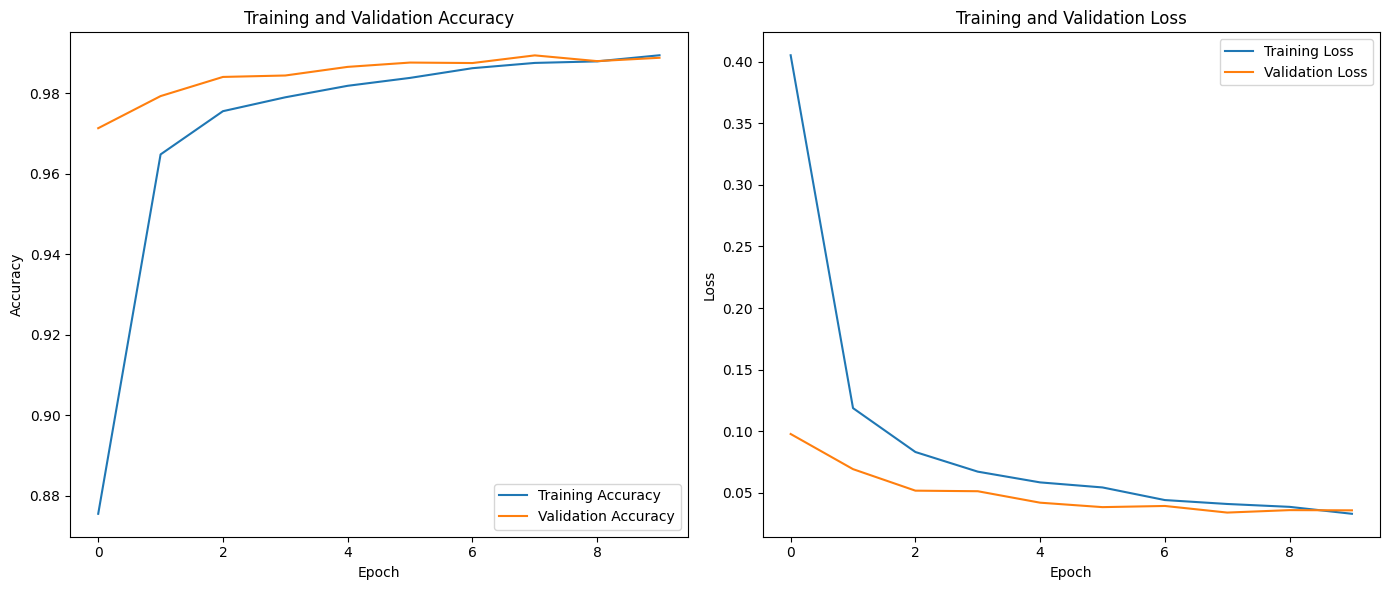

In [4]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# Step 2: Load the dataset
data = pd.read_csv('/content/train.csv')

# Step 3: Split dataset into features (X) and target (y)
X = data.drop('label', axis=1).values
y = data['label'].values

# Step 4: Reshape the features to 28x28 images and normalize pixel values to 0-1
X = X.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Step 5: Convert target labels (y) to categorical format
y = to_categorical(y, 10)

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Define the Convolutional Neural Network (CNN) architecture
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D feature maps to 1D for fully connected layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer for classification (10 classes, one for each digit)
model.add(Dense(10, activation='softmax'))

# Step 8: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 9: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# Step 10: Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Step 11: Predict classes for test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Step 12: Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)

# Step 13: Calculate Precision, Recall, F1-Score
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Step 14: Visualize Normalized Confusion Matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 15: Plot Training and Validation Accuracy and Loss
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy Plot
ax[0].plot(history.history['accuracy'], label='Training Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

# Loss Plot
ax[1].plot(history.history['loss'], label='Training Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Training and Validation Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.tight_layout()
plt.show()